In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from IPython.display import display, Markdown
%matplotlib inline

In [2]:
url = 'https://osf.io/ns9yr/download'
urllib.request.urlretrieve(url, 'data.csv')
data = pd.read_csv('data.csv', parse_dates=['Date created']).sort_values(by=['Date created'])
data.set_index('Date created',inplace=True)
data['count'] = range(1,len(data) + 1)
countsum = data['count'][-1]
DLsum = data['Download count'].sum()
today = date.today()
display(Markdown('# As of ' + today.strftime("%B %d, %Y") + ' there are <span style=\"color:red\">'+ str(countsum) + '</span> preprints on Engineering Archive and they have been downloaded <span style=\"color:red\">'+ str(DLsum) + '</span> times!'))

# As of January 30, 2020 there are <span style="color:red">815</span> preprints on Engineering Archive and they have been downloaded <span style="color:red">323165</span> times!

Text(0,0.5,'Number of engrXiv prints')

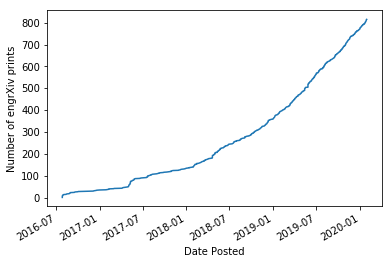

In [3]:
outplot = data.plot(y='count', legend=False)
outplot.set_xlabel("Date Posted")
outplot.set_ylabel("Number of engrXiv prints")

Text(0,0.5,'Number of engrXiv prints posted per month')

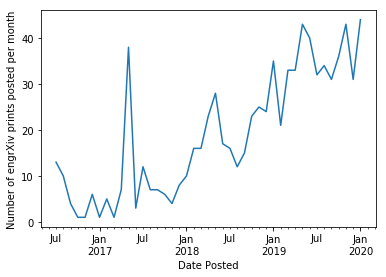

In [4]:
outplot2 = data.resample('M').count().plot(y='count', legend=False)
outplot2.set_xlabel("Date Posted")
outplot2.set_ylabel("Number of engrXiv prints posted per month")

Text(0,0.5,'Number of engrXiv prints posted per year')

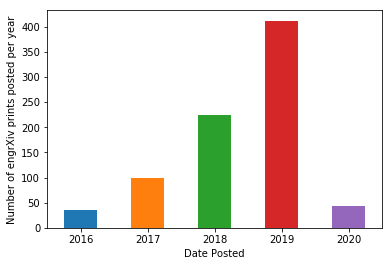

In [5]:
outplot3 = data.resample('Y', kind='period').count().plot.bar(y='count', legend=False, rot=0)
outplot3.set_xlabel("Date Posted")
outplot3.set_ylabel("Number of engrXiv prints posted per year")